In [1]:
 # !pip install kagglehub
# just for installing library

In [2]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("yeanzc/telco-customer-churn-ibm-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Rahul\.cache\kagglehub\datasets\yeanzc\telco-customer-churn-ibm-dataset\versions\1


# Loading Modules

In [3]:
# ! pip install graphviz 
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score,roc_auc_score,make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# Loading Datasets
#### -> Telco churn dataset is used from IBM Samples

In [4]:
df=pd.read_excel('Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


####  here last four variables contain exit interview information and should not be used for prediction , so we will remove it 

In [5]:
df.drop(['Churn Label','Churn Score','CLTV','Churn Reason'],axis=1,inplace=True)


In [6]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [7]:
df['Count'].unique()

array([1])

In [8]:
df['Country'].unique()

array(['United States'], dtype=object)

In [9]:
df['State'].unique()

array(['California'], dtype=object)

#### Here from above we seen that the columns name Count,Country,State have only one value in it so we leave it in.

In [10]:
df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], shape=(1129,), dtype=object)

#### So City contain contain bunch of city name so it can be helpful for maling prediction

#### Lastly we also remove customerid because it contain all unique values and latlong column also 

In [11]:
df.drop(['CustomerID','Count','Country','State','Lat Long'],axis=1,inplace=True)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


#### Note : Althrough it is OK to have WHiteSpaces in city names of xgboost classification , we can't have any whitspaces if we want to draw a tree . so we will remove whitespaces in city column

In [12]:
df['City'].replace(' ','_',regex=True,inplace=True)
df.head()

C:\Users\Rahul\AppData\Local\Temp\ipykernel_16424\1721609938.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].replace(' ','_',regex=True,inplace=True)


,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [13]:
df.City.unique()[0:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

#### We will also eliminate the whitespaces int the columns names

In [14]:
df.columns=df.columns.str.replace(' ','_')
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


# Missing Data Part 1: Identifying Missing Data

In [15]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

In [16]:
df['Phone_Service'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
filt=(df['Total_Charges']==' ')
len(df['Total_Charges'].loc[filt])

11

In [18]:
df.loc[filt]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [19]:
# Setting total charges to zero
df.loc[filt,'Total_Charges']=0

In [20]:
filt_tenure=(df['Tenure_Months']==0)
df.loc[filt]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


#### Still Total_Charges as object dtype and xgboost only allows bool,int,float dtype

In [21]:
df['Total_Charges']=pd.to_numeric(df['Total_Charges'])
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

In [22]:
# We are replacing other whitespaces in all columns
df.replace(' ','_',regex=True,inplace=True)
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


# Format Data Part 1: Split the Data into dependent and Independent Variables

#### X -> Column of dat that we woult make use for classification
#### y -> represent the thing that we want to predict

In [23]:
X=df.drop('Churn_Value',axis=1).copy()
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [24]:
y=df['Churn_Value'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int64

# Format the Data part 2: ONE-HOT Encoding 

In [25]:
pd.get_dummies(X,columns=['Payment_Method'],dtype='int').head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Monthly_Charges,Total_Charges,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,Month-to-month,Yes,53.85,108.15,0,0,0,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,Month-to-month,Yes,70.70,151.65,0,0,1,0
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,Yes,Month-to-month,Yes,99.65,820.50,0,0,1,0
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Month-to-month,Yes,104.80,3046.05,0,0,1,0
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,Month-to-month,Yes,103.70,5036.30,1,0,0,0


In [26]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

In [27]:
X_encoded=pd.get_dummies(X,columns=['City','Gender','Senior_Citizen','Partner','Dependents','Phone_Service','Multiple_Lines',
                                   'Internet_Service','Online_Security','Online_Backup','Device_Protection','Tech_Support','Streaming_TV',
                                   'Streaming_Movies','Contract','Paperless_Billing','Payment_Method'])
X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
1,90005,34.059281,-118.307420,2,70.70,151.65,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,90006,34.048013,-118.293953,8,99.65,820.50,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
3,90010,34.062125,-118.315709,28,104.80,3046.05,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
4,90015,34.039224,-118.266293,49,103.70,5036.30,False,False,False,False,...,True,True,False,False,False,True,True,False,False,False


In [28]:
y.unique()

array([1, 0])

# Build A Preliminary XGBoost Model

In [29]:
sum(y)/len(y)

0.2653698707936959

#### This is done because here almost 27 % of people left the company so we are making strafied train test split in order to maintain the same percentage of people who left the company both training and testing dataset 

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42,stratify=y)

In [31]:
sum(y_train)/len(y_train)

0.2654297614539947

In [32]:
sum(y_test)/len(y_test)

0.26519023282226006

#### Ready to build xgboost model

In [33]:
import xgboost
print(xgboost.__version__)


3.0.2


In [34]:
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',# Metric for imbalanced data
    early_stopping_rounds=10,
    seed=42
)

# Fit with early stopping
xgb_clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    
    verbose=True
)

[0]	validation_0-aucpr:0.64484
[1]	validation_0-aucpr:0.65281
[2]	validation_0-aucpr:0.66059
[3]	validation_0-aucpr:0.65424
[4]	validation_0-aucpr:0.66064
[5]	validation_0-aucpr:0.66153
[6]	validation_0-aucpr:0.66547
[7]	validation_0-aucpr:0.66499
[8]	validation_0-aucpr:0.66667
[9]	validation_0-aucpr:0.66309
[10]	validation_0-aucpr:0.66416
[11]	validation_0-aucpr:0.66180
[12]	validation_0-aucpr:0.66855
[13]	validation_0-aucpr:0.66674
[14]	validation_0-aucpr:0.66577
[15]	validation_0-aucpr:0.66509
[16]	validation_0-aucpr:0.66491
[17]	validation_0-aucpr:0.66553
[18]	validation_0-aucpr:0.66463
[19]	validation_0-aucpr:0.66598
[20]	validation_0-aucpr:0.66601
[21]	validation_0-aucpr:0.66762
[22]	validation_0-aucpr:0.66726


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,10
,enable_categorical,False
,eval_metric,'aucpr'


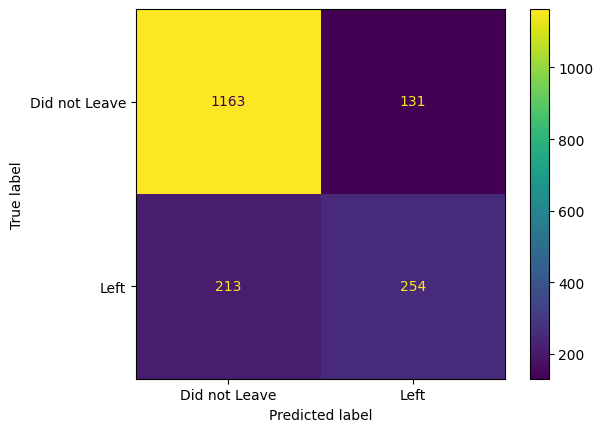

In [35]:
y_pred = xgb_clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Did not Leave", "Left"]).plot()

Here what happen in second row lot of incorrect classification are made because of imbalanced data so we will use xgboost parameter scale_pos_weight that helps with imbalance data

# Optimize Parameters Using Cross Validation and GridSearch()   

hyperparameter like max_depth,maximum tree depth , learning rate , gamma , reg_lambda 

In [36]:
### this i had done in other colab set because it takes almost 15 min to ran  so final output is 

#Final optimize parameter is 
gamma=0.25,learning_rate=0.1,max_depth=4,reg_lambda=10

# Building,Evaluting,Drawing,and Interpreting the optimized XGBoost model

In [37]:
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    gamma=0.25,
    learn_rate=0.1,
    max_depth=4,
    reg_lambda=10,
    scale_pos_weight=3,
    subsample=0.9,
    colsample_bytree=0.5,
    seed=42,
    eval_metric='aucpr',
    early_stopping_rounds=10,
)

# Fit with early stopping
xgb_clf.fit(
    X_train, y_train,
    verbose=True,
    eval_set=[(X_test, y_test)],

)

[0]	validation_0-aucpr:0.54568
[1]	validation_0-aucpr:0.60851
[2]	validation_0-aucpr:0.63051


C:\Users\Rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:15:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "learn_rate" } are not used.

  self.starting_round = model.num_boosted_rounds()


[3]	validation_0-aucpr:0.63604
[4]	validation_0-aucpr:0.63756
[5]	validation_0-aucpr:0.63749
[6]	validation_0-aucpr:0.65751
[7]	validation_0-aucpr:0.65561
[8]	validation_0-aucpr:0.66154
[9]	validation_0-aucpr:0.66024
[10]	validation_0-aucpr:0.66764
[11]	validation_0-aucpr:0.66815
[12]	validation_0-aucpr:0.66974
[13]	validation_0-aucpr:0.67190
[14]	validation_0-aucpr:0.66867
[15]	validation_0-aucpr:0.66632
[16]	validation_0-aucpr:0.66780
[17]	validation_0-aucpr:0.66586
[18]	validation_0-aucpr:0.66474
[19]	validation_0-aucpr:0.66798
[20]	validation_0-aucpr:0.66803
[21]	validation_0-aucpr:0.66665
[22]	validation_0-aucpr:0.66627
[23]	validation_0-aucpr:0.66571


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.5
,device,None
,early_stopping_rounds,10
,enable_categorical,False
,eval_metric,'aucpr'


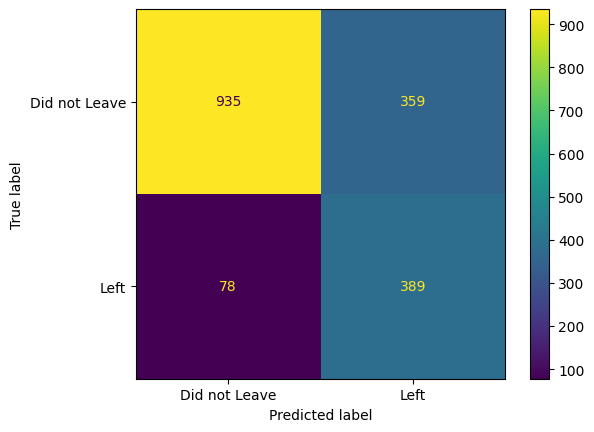

In [38]:
y_pred = xgb_clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Did not Leave", "Left"]).plot()

C:\Users\Rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:15:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "learn_rate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


weight: {'Latitude': 2.0, 'Monthly_Charges': 4.0, 'City_Carlsbad': 1.0, 'Internet_Service_Fiber_optic': 1.0, 'Online_Security_No': 3.0, 'Online_Backup_No': 1.0, 'Contract_Month-to-month': 1.0, 'Contract_One_year': 1.0, 'Payment_Method_Electronic_check': 1.0}
gain: {'Latitude': 14.340876579284668, 'Monthly_Charges': 38.679866790771484, 'City_Carlsbad': 5.333251953125, 'Internet_Service_Fiber_optic': 271.78826904296875, 'Online_Security_No': 40.69451141357422, 'Online_Backup_No': 10.577386856079102, 'Contract_Month-to-month': 1652.5413818359375, 'Contract_One_year': 40.047489166259766, 'Payment_Method_Electronic_check': 17.57745361328125}
cover: {'Latitude': 154.4987335205078, 'Monthly_Charges': 254.08676147460938, 'City_Carlsbad': 328.4658203125, 'Internet_Service_Fiber_optic': 1205.7889404296875, 'Online_Security_No': 544.3646850585938, 'Online_Backup_No': 106.07748413085938, 'Contract_Month-to-month': 1805.0643310546875, 'Contract_One_year': 171.97032165527344, 'Payment_Method_Electro

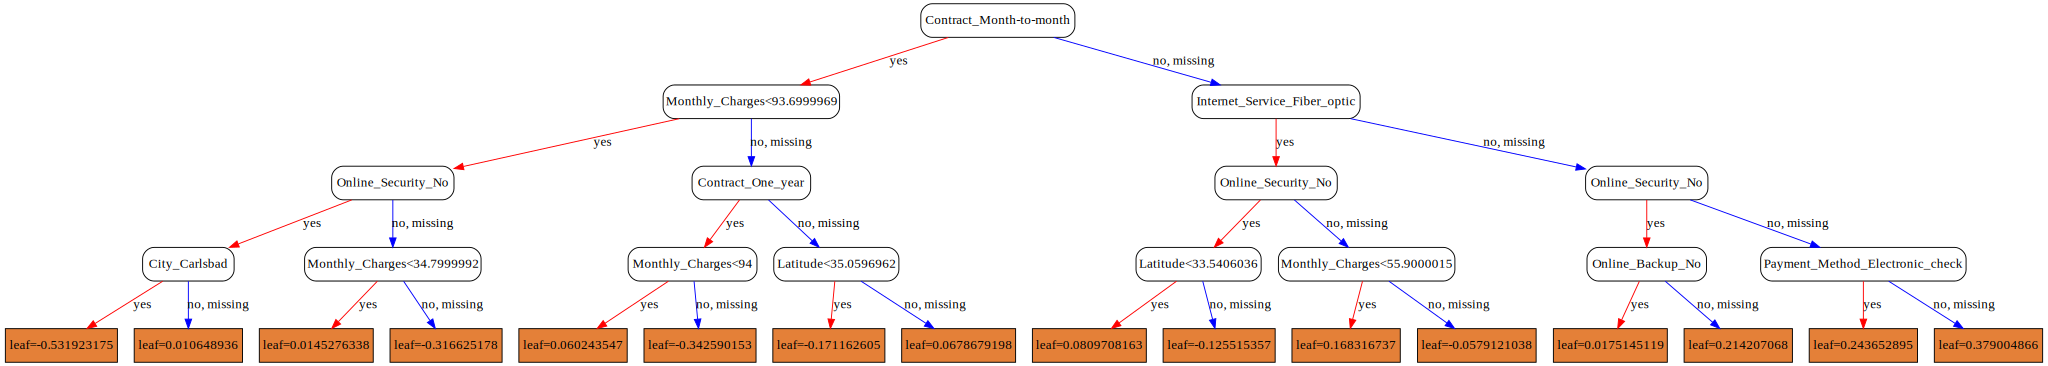

In [39]:
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    gamma=0.25,
    learn_rate=0.1,
    max_depth=4,
    reg_lambda=10,
    scale_pos_weight=3,
    subsample=0.9,
    colsample_bytree=0.5,
    seed=42,
    n_estimators=1
)

# Fit with early stopping
xgb_clf.fit(
    X_train, y_train
)

bst=xgb_clf.get_booster()
for importance_type in ('weight','gain','cover','total_gain','total_cover'):
    print('%s:'% importance_type,bst.get_score(importance_type=importance_type))
node_params={'shape':'box',
            'style':'filled , rounded',
            'fillcolor':'#78cbe'}
leaf_params={'shape':'box',
            'style':'filled',
            'fillcolor':'#e48038'}

xgb.to_graphviz(xgb_clf,num_trees=0,size="5,10",
               condition_node_params=node_params,
               leaf_node_params=leaf_params)